In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import crunch_communities as cc

In [51]:
G = nx.read_edgelist('data/crunchbase_holddups_totransform.tsv', delimiter = '\t')

In [52]:
G.number_of_nodes()

235806

In [53]:
G.number_of_edges()

269607

In [54]:
nx.shortest_path(G,"IBM","Apple")

['IBM', u'5508635c708f6eaf98c9dce20d239889', 'Apple']

In [55]:
nx.all_neighbors(G, "Sony")

<dictionary-keyiterator at 0x133fab680>

In [56]:
G2 = nx.read_edgelist('data/company_edges.tsv', delimiter = '\t')

In [69]:
degrees = G2.degree()


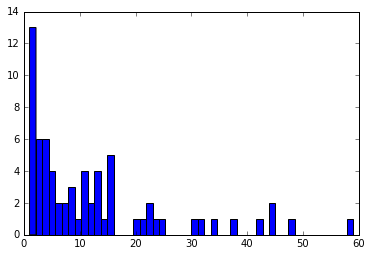

In [70]:
plt.hist(degrees.values(), bins = 50)
plt.show()

What is the most important company?

In [60]:
Counter(degrees).most_common(10)

[(u'Amazon', 59),
 (u'Twitter', 48),
 (u'Facebook', 44),
 (u'Apple', 44),
 (u'Microsoft', 42),
 (u'Google', 37),
 (u'IBM', 34),
 (u'YouTube', 32),
 (u'Netflix', 30),
 (u'Samsung Electronics', 25)]

How many connected components are there?

In [65]:
nx.number_connected_components(G)

24

Make histogram of the sizes of the connected components

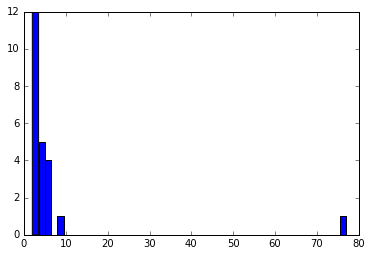

In [66]:
comps = list(nx.connected_components(G))
comp_sizes = Counter({i: len(comps[i]) for i in xrange(len(comps))})
largest = comp_sizes.most_common(1)[0][0]
comp_sizes.pop(largest)
plt.hist(comp_sizes.values(), bins = 50)
plt.show()

What is the most important company for betweeness centrality?

In [72]:
Counter(nx.betweenness_centrality(G2)).most_common(10)


[(u'Amazon', 0.31079836829098545),
 (u'Twitter', 0.12174364192282622),
 (u'Microsoft', 0.09350911575749951),
 (u'Apple', 0.09271953772911554),
 (u'Facebook', 0.08790274539536251),
 (u'IBM', 0.056400230755726026),
 (u'Google', 0.048572683779005116),
 (u'Netflix', 0.022064554489329022),
 (u'YouTube', 0.020569791902300485),
 (u'Samsung Electronics', 0.016301196542037794)]

What is the most important company according to eigenvector centrality?

In [73]:
Counter(nx.eigenvector_centrality(G2)).most_common(10)

[(u'Amazon', 0.27280216403230106),
 (u'Twitter', 0.25937566328159367),
 (u'Facebook', 0.25220837514543293),
 (u'Apple', 0.2499283135440121),
 (u'Microsoft', 0.2425282104946812),
 (u'Google', 0.23058286396789088),
 (u'YouTube', 0.2174142226761157),
 (u'IBM', 0.21578402273372652),
 (u'Netflix', 0.2008891714482185),
 (u'Salesforce', 0.18393080863397349)]

In [ ]:
communities = cc.find_communities_n(G)

In [ ]:
c = cc.find_communities_modularity(G)

In [ ]:
print "Optimal number of communities: %d" % len(c)